#Modified SIR toy model for Corona
This simple 



In [81]:
#This is the SIRD model
#A simple differential equation
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def SIRD(beta,gamma,death_rate,death_rate_without_healthcare,health_care_capacity):

    # Population, initial infected, initial susceptible. 
    N = 100000
    I0, R0 = 1, 0
    D0 = 0
    S0 = N - I0 - R0
    t = np.linspace(0, 700, 700)

    # The SIRd model differential equations.
    def deriv_death(y, t, N, beta, gamma,  death_rate, health_care_capacity, death_rate_without_healthcare):
        S, I, R, D = y
        dSdt = (-beta * S * I) / N
        
        #This is an addition to the SIR model:
        # A certain population who is sick dies when treated.
        # There are finite hospital beds. People who are not treated die at a higher rate.
        dDdt = death_rate*I
        if I > health_care_capacity:
            untreated_infected = I - health_care_capacity
            dDdt +=  death_rate_without_healthcare*untreated_infected
        dIdt = beta * S * I / N - gamma * I - dDdt
        dRdt = gamma * I

        return dSdt, dIdt, dRdt, dDdt

    y0 = S0, I0, R0, D0
    ret = odeint(deriv_death, y0, t, args=(N, beta, gamma, death_rate,health_care_capacity,death_rate_without_healthcare))
    S, I, R, D = ret.T

    return t,S,I,R,D





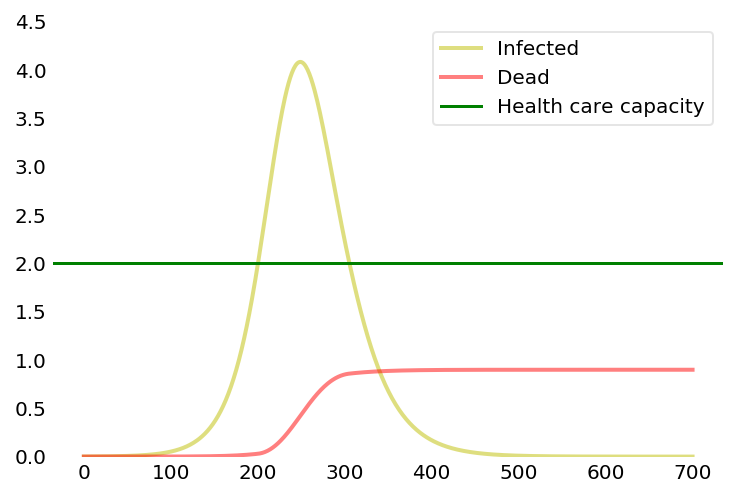

In [102]:
#This is code for plotting and looking at the results.

beta, gamma = 0.14, 1./10
death_rate = 0.005/10
death_rate_without_healthcare = 0.05/10
health_care_capacity = 2000

t,S,I,R,D = SIRD(beta,gamma,death_rate,death_rate_without_healthcare,health_care_capacity)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)

#ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'y', alpha=0.5, lw=2, label='Infected')
#ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, D/1000, 'r', alpha=0.5, lw=2, label='Dead')
ax.axhline(health_care_capacity/1000, color='g', linestyle='-', label="Health care capacity")

ax.set_ylim(0,4.5)

ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)

ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)

for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [100]:
#This code animates the result, with varying infection rate.

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
plt.rcParams['animation.writer'] = 'ffmpeg'

betas=[]
deads=[]

fig, ax = plt.subplots()

plt.xlabel('time')
plt.ylabel('population')

ax.set_xlim(( 0, 700))
ax.set_ylim(0,4)

ax.set_yticklabels([])
ax.set_xticklabels([])

line, = ax.plot([], [], lw=2)

lines = []
for index in range(3):
    lobj = ax.plot([],[],lw=2,color=['black','red','green'][index],label=['Infected','Dead','Healthcare capacity'][index])[0]
    lines.append(lobj)

legend = ax.legend()
legend.get_frame().set_alpha(0.5)

def init():
    for line in lines:
        line.set_data([],[])
    return lines


def animate(i):
    x1,y1 = [],[]
    x2,y2 = [],[]
    x3,y3 = [],[]

    beta, gamma = 0.14, 1./10
    death_rate = 0.01/10
    death_rate_without_healthcare = 0.1/10
    health_care_capacity = 2000
    beta2 = beta-i/300
    t,S,I,R,D = SIRD(beta2,gamma,death_rate,death_rate_without_healthcare,health_care_capacity)
    
    #Save the beta value and the final death rate for separate plotting
    betas.append(beta2)
    deads.append(D[len(D)-1])

    x = t
    y = I/1000
    x1.append(x)
    y1.append(y)

    x = t
    y = D/1000
    x2.append(x)
    y2.append(y)
    x = t
    y = len(t)*[health_care_capacity/1000]
    x3.append(x)
    y3.append(y)

    xlist = [x1, x2, x3]
    ylist = [y1, y2, y3]

    for lnum,line in enumerate(lines):
        line.set_data(xlist[lnum], ylist[lnum])

    return lines

anim = animation.FuncAnimation(fig, animate, init_func=init,frames=10, interval=200, blit=False)

HTML(anim.to_html5_video())


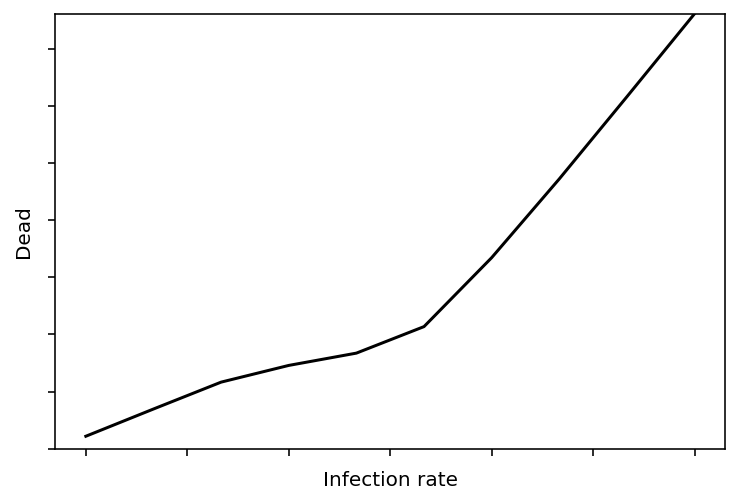

In [110]:
#Plot the death rate as a runfciton of infection rate, to show nonlinearity
fig, ax = plt.subplots()
plt.ylabel('Dead')
plt.xlabel('Infection rate')
plt.ylim(0,max(deads))
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.plot(betas,deads,color='black')